In [ ]:
'''10.1)
Use Iris flower dataset and perform following operations. Scan the dataset and give the inference as: 
1. List down the features and their types (e.g., numeric, nominal) available in the dataset. 
2. Create a histogram for each feature in the dataset to illustrate the feature distributions. 
3. Create a boxplot for each feature in the dataset. 
'''

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]


In [7]:
# 1. List down the features and their types
feature_types = ['numeric'] * 4  # All features are numeric
feature_types.append('nominal')  # Adding 'species' as a nominal categorical feature

print("Features and their types:")
for feature, ftype in zip(df.columns, feature_types):
    print(f"- {feature}: {ftype}")


Features and their types:
- sepal length (cm): numeric
- sepal width (cm): numeric
- petal length (cm): numeric
- petal width (cm): numeric
- species: nominal


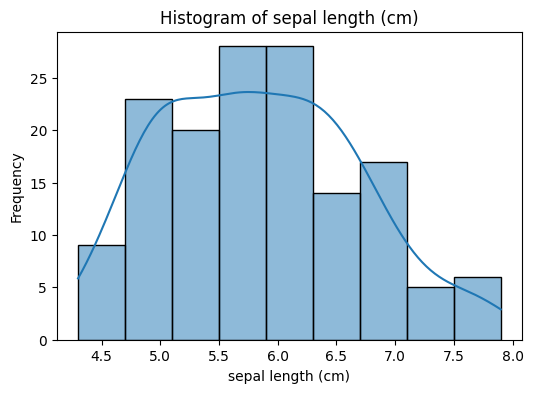

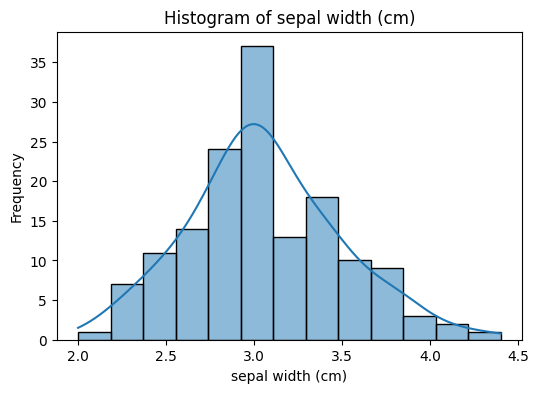

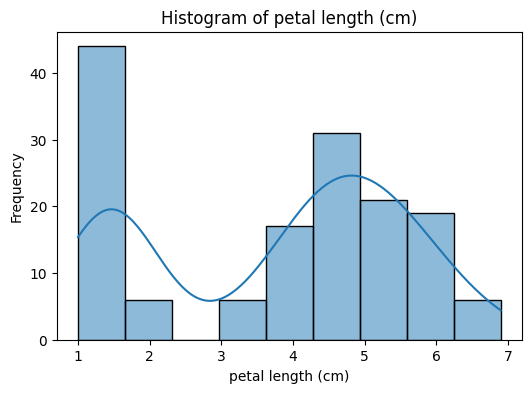

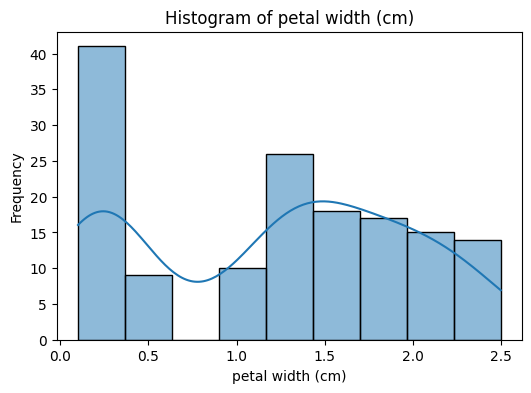

In [8]:
# 2. Create a histogram for each feature
numeric_features = iris.feature_names
for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

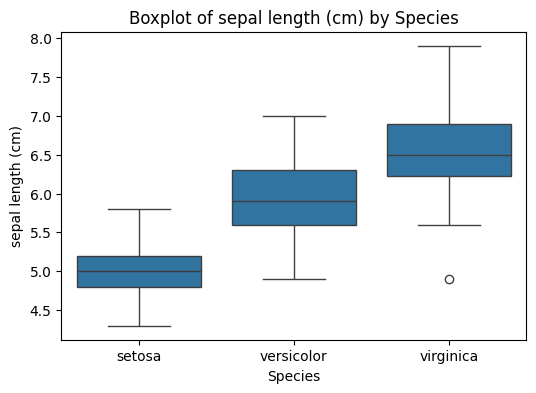

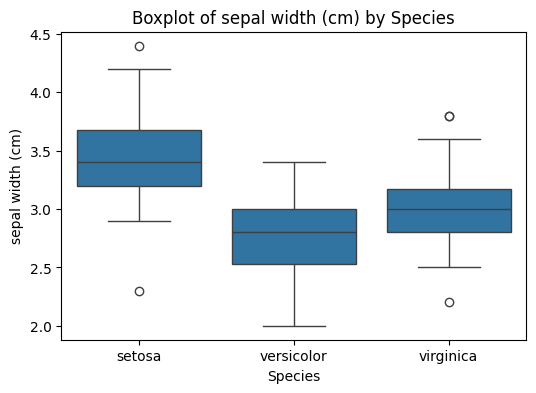

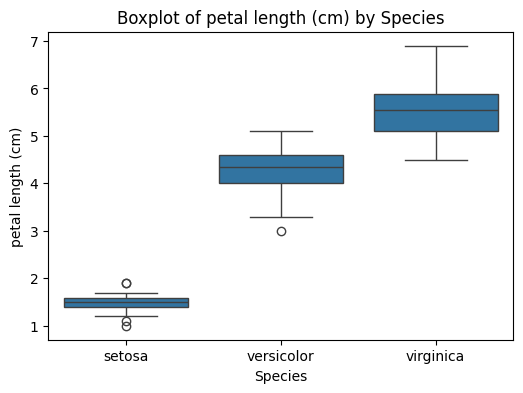

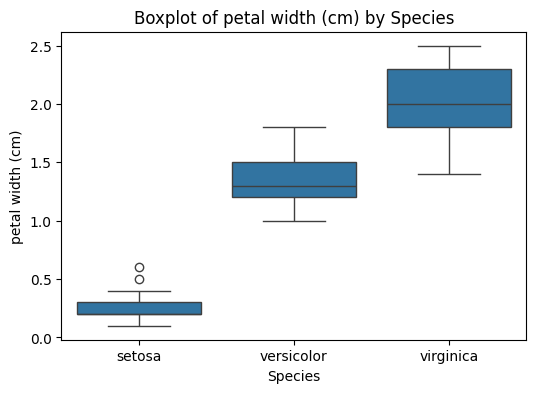

In [9]:
# 3. Create a boxplot for each feature
for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Species')
    plt.xlabel('Species')
    plt.ylabel(feature)
    plt.show()

In [10]:
# Define function to remove outliers based on IQR method
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[((df >= lower_bound) & (df <= upper_bound)).all(axis=1)]


In [11]:
# Remove outliers from numeric features
numeric_features = iris.feature_names
df_numeric = df[numeric_features]
df_cleaned = remove_outliers(df_numeric)


In [15]:
# Join cleaned numeric features with species column
df_cleaned['species'] = df['species']


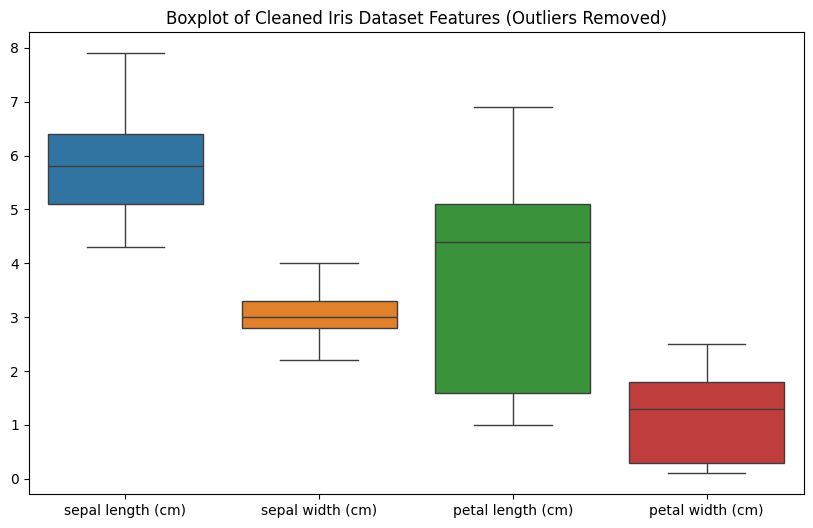

In [16]:
# Create boxplot of cleaned data to verify removal of outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned.drop('species', axis=1))
plt.title('Boxplot of Cleaned Iris Dataset Features (Outliers Removed)')
plt.show()